# PTC Equivalent Calculator

Calcualte the equivalent resistance of a parallel PTC thermistor and regular resistor and compare this response to the ideal 3400ppm/C thermistor with the same equivalent resistance at room temperature (T=25C).

Approximating an ideal PTC thermistor with coefficient 3400ppm/C
PTC R0=10.000k, alpha=6400.0ppm/C
Rp = 15.000k
Req(T=25) = 6.000k
max. error (T=0 to 70C): 0.0192


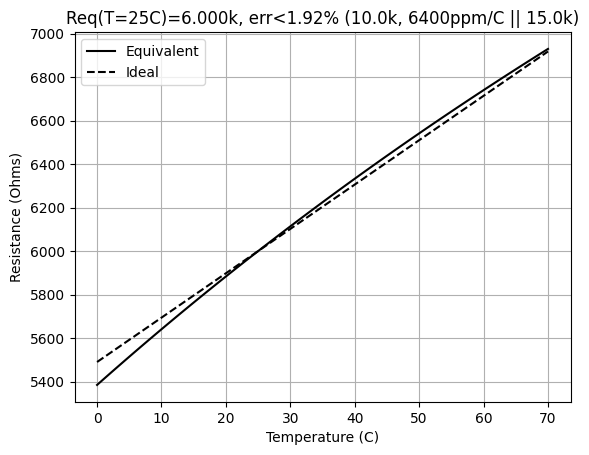

In [22]:
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(0,70,71)

T0 = 25
R0 = 10000
alpha = 0.0064
R = R0*(1 + alpha*(T-T0))
Rp = 15000

Req = 1./(1./R + 1./Rp)
Req25 = 1./(1./R0 + 1./Rp)
Rideal = Req25 *(1. + 0.0034*(T-T0))
max_rel_err = np.max(np.abs((Req - Rideal)/Rideal))

print(f'Approximating an ideal PTC thermistor with coefficient 3400ppm/C')
print(f'PTC R0={R0/1000.:1.3f}k, alpha={alpha*1e6}ppm/C')
print(f'Rp = {Rp/1000:1.3f}k')
print(f'Req(T=25) = {Req25/1000:1.3f}k')
print(f'max. error (T=0 to 70C): {max_rel_err:1.03g}')
plt.plot(T, Req, 'k-', T, Rideal, 'k--')
plt.xlabel('Temperature (C)')
plt.ylabel('Resistance (Ohms)')
plt.legend(('Equivalent','Ideal'))
plt.title(f'Req(T=25C)={Req25/1000.:1.3f}k, err<{max_rel_err*100:1.3g}% ({R0/1000}k, {alpha*1e6:1.0f}ppm/C || {Rp/1000}k)')
plt.grid(True)
plt.show()


